# Linear and Logistic regression with pandas

I conclude from this experiment that unless you absolutely need to, because of data size or speed, you're better off doing this in R, which is made for it.

## Ordinary Least Squares using pandas

You have to have a library called 'statsmodels' installed in order to use the linear regression tools in pandas. 

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.stats.api import ols

## Get R-like output from a (synthetic) linear regression.

In [35]:
# use array to create these and not ndarray:
# with ndarray, that list is interpreted as the dimensions
lista = np.array([1,2,3,4,5])
listb = np.array([2,3,1,4,5])

# note that the dependent variable listc is created with known coefficients.
# the generating formula is: C = 2A - B + 7 + noise.
listc = 2*lista + -1*listb + np.full([5], 7.0) + np.random.randn(5)*.1

df = pd.DataFrame({"A": lista, 
                   "B": listb, 
                   "C": listc})

result = ols(y=df['C'], x=df[['A','B']])
result


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <A> + <B> + <intercept>

Number of Observations:         5
Number of Degrees of Freedom:   3

R-squared:         0.9996
Adj R-squared:     0.9992

Rmse:              0.0661

F-stat (2, 2):  2551.1438, p-value:     0.0004

Degrees of Freedom: model 2, resid 2

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             A     2.0359     0.0293      69.55     0.0002     1.9785     2.0932
             B    -1.0844     0.0293     -37.04     0.0007    -1.1418    -1.0270
     intercept     7.0954     0.0742      95.66     0.0001     6.9500     7.2408
---------------------------------End of Summary---------------------------------

In [28]:
# The numpy 'full' function is like the 'repl' function in R (for array creation)
# a.shape in numpy is like dim(a) in R.
np.full([5],7.0).shape

(5,)

## Get R-like output from logistic regression.

This is taken from: http://blog.yhat.com/posts/logistic-regression-and-python.html

In [45]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

df2 = pd.read_csv("gradschool.csv")
print df2.columns # shows headers

Index([u'admit', u'gre', u'gpa', u'rank'], dtype='object')


In [52]:
# show a few records. Note the admit variable is binary.
# rank 1 institutions have the highest prestige.
df2.head(25) 

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


In [47]:
# rename the 'rank' column because there is also a DataFrame method called 'rank'
df2.columns = ["admit", "gre", "gpa", "prestige"]
print df2.columns

Index([u'admit', u'gre', u'gpa', u'prestige'], dtype='object')


In [49]:
df2.describe()

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [53]:

# You can look at frequency tables to see a view of what is going on.
# The frequency table below compares prestige and whether or not someone was admitted.
# prestige == 1 is the highest, apparently. 
# crosstab is a function that lets you do multidimensional frequency tables. 
# you are marginalizing counts over the other independent variables. 
# Notice below that it looks easier to get into the high-prestige universities than the other ones.
# that can't be right!
pd.crosstab(df2['admit'], df2['prestige'])


prestige,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


In [54]:
#This is not what you want. You want to bin the gpa values before you do a frequency analysis.
pd.crosstab(df2['admit'], df2['gpa'] )

gpa,2.26,2.42,2.48,2.52,2.55,2.56,2.62,2.63,2.65,2.67,...,3.9,3.91,3.92,3.93,3.94,3.95,3.97,3.98,3.99,4.0
admit,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,0,1,...,2,1,2,1,4,1,1,0,2,15
1,0,1,0,0,0,0,1,0,1,1,...,1,0,0,0,1,4,0,1,1,13


In [65]:
# the cut function creates bins. In this case there are 6 equal-width bins spanning the range of gpas in the data set. 
# 
df2['gpa_bin']=pd.cut(df2['gpa'], bins = 6, labels = False, precision = 1, include_lowest=True)

In [66]:
df2.head()

,admit,gre,gpa,prestige,gpa_bin
0,0,380,3.61,3,4
1,1,660,3.67,3,4
2,1,800,4.00,1,5
3,1,640,3.19,4,3
4,0,520,2.93,4,2


In [67]:
# Now you can call crosstab!
pd.crosstab(df2['admit'], df2['gpa_bin'])

gpa_bin,0,1,2,3,4,5
admit,,,,,,
0,5,20,57,81,57,53
1,1,6,15,24,45,36


In [68]:
#do the same with gres. Make 10 bins this time.
df2['gre_bin']=pd.cut(df2['gre'], bins = 10, labels = False, precision = 1, include_lowest=True)
df2.head()

,admit,gre,gpa,prestige,gpa_bin,gre_bin
0,0,380,3.61,3,4,2
1,1,660,3.67,3,4,7
2,1,800,4.00,1,5,9
3,1,640,3.19,4,3,7
4,0,520,2.93,4,2,5


In [69]:
pd.crosstab(df2['admit'], df2['gre_bin'])

gre_bin,0,1,2,3,4,5,6,7,8,9
admit,,,,,,,,,,
0,1,2,15,24,39,50,55,39,32,16
1,0,1,1,4,12,25,27,26,12,19


In [76]:
# ha! I remembered to use the loc function!
df3 = df2.loc[:,['admit', 'gre', 'gpa', 'prestige']]

# this gives me the original dataframe back
df3.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


[]

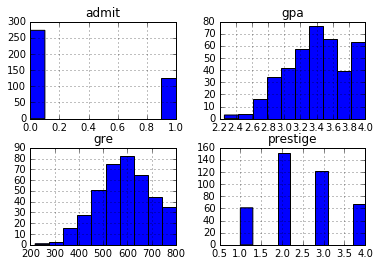

In [77]:
# easy histogram function. Note up front that about 1 out of 3 applicants were admitted.
df3.hist()
pl.plot()

In [86]:
# now you can convert the categorical variables to dummies.
dummy_prestige = pd.get_dummies(df2['prestige'], prefix = "prestige")

# note how the dummy variables relate to the original variable
df2[["prestige"]].join(dummy_prestige).head()

# get rid of the prestige column, and one of the dummies, 
# to have an independent set of dummy representatives for the original prestige variable.
df4 = df3[["admit", "gre", "gpa"]].join(dummy_prestige.iloc[:, 1:4])

# manually add a column of 1s for an intercept. This is different from R, entirely.
df4["intercept"] = 1.0
df4.head()

,admit,gre,gpa,prestige_2,prestige_3,prestige_4,intercept
0,0,380,3.61,0,1,0,1
1,1,660,3.67,0,1,0,1
2,1,800,4.00,0,0,0,1
3,1,640,3.19,0,0,1,1
4,0,520,2.93,0,0,1,1


## Doing the logistic regression from this dataset

In [87]:
indep_cols = df4.columns[1:]
print indep_cols

Index([u'gre', u'gpa', u'prestige_2', u'prestige_3', u'prestige_4',
       u'intercept'],
      dtype='object')


## Results of the logistic regression

the summary() function on statsmodels results gives nice output. 

- the GRE variable does not look especially significant. Can we drop it?
- gpa is significant and positive
- as the prestige of the university drops, it appears admittance is less likely. This seems paradoxical. Is something confounding it?




In [91]:
logit = sm.Logit(df4["admit"], df4[indep_cols])
result = logit.fit()
print result.summary() # this is a statsmodels function -- it has nice summaries.

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Thu, 03 Mar 2016   Pseudo R-squ.:                 0.08292
Time:                        20:01:22   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.578e-08
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
gre            0.0023      0.001      2.070      0.038         0.000     0.004
gpa            0.8040      0.

### Interpretation (from http://stats.stackexchange.com/questions/108995/interpreting-residual-and-null-deviance-in-glm-r)

    Let LL = loglikelihood

    Here is a quick summary of what you see from the summary(glm.fit) output,

    Null Deviance = 2(LL(Saturated Model) - LL(Null Model)) on df = df_Sat - df_Null

    Residual Deviance = 2(LL(Saturated Model) - LL(Proposed Model)) df = df_Sat - df_Res

    The Saturated Model is a model that assumes each data point has its own parameters (which means you have n parameters to estimate.)

    The Null Model assumes the exact "opposite", in that is assumes one parameter for all of the data points, which means you only estimate 1 parameter.

    The Proposed Model assumes you can explain your data points with p parameters + an intercept term, so you have p+1 parameters.

    If your Null Deviance is really small, it means that the Null Model explains the data pretty well. Likewise with your Residual Deviance.

    What does really small mean? If your model is "good" then your Deviance is approx Chi^2 with (df_sat - df_model) degrees of freedom.

    If you want to compare you Null model with your Proposed model, then you can look at

    (Null Deviance - Residual Deviance) approx Chi^2 with df Proposed - df Null = (n-(p+1))-(n-1)=p

    Are the results you gave directly from R? They seem a little bit odd, because generally you should see that the degrees of freedom reported on the Null are always higher than the degrees of freedom reported on the Residual. That is because again, 

        Null Deviance df = Saturated df - Null df = n-1 
        Residual Deviance df = Saturated df - Proposed df = n-(p+1)
    
    
### So, pandas output does not give residual deviance, it gives Null LL and model LL. 

My Notes on this output: 

The log-likelihood ratio (LLR) test that the pandas output is describing is a test comparing the null (intercept-only) model to the proposed model. i confirmed this by calculating the statistic offline, and checking its p-value, which is exactly the same as the reported one.

- why do we want to test the proposed vs. the null model? The question we really want answered is this: is this proposed model any better than the intercept-only model? 

We really aren't asking whether it's a good fit to the data; we are just asking whether it's a better fit than the intercept-only model. In order to do that, we mangle our assumptions a bit so that we meet the assumptions of this test: we assume (behind the scenes) that the proposed model is good, and then we ask whether the null model is equally good. A small p-value suggests that it isn't, so the proposed model, whether it fits or not, is at least better than nothing. 

I guess the point is to see whether our model is any better than the null model, and this test suggests that it is.

The basis of the test is this: the null hypothesis is that the smaller model (the intercept-only model) being tested is valid, and the alternative is that the larger model (the proposed model) is valid. The statistic is -2 (LL(smaller) - LL(larger)), and in the limit this is distributed as chisq with df = difference in number of model parameters. 

In [96]:
from scipy.stats import chi2
aa = 2*(-229.26 - (-249.99))
1 - chi2.cdf(aa, df=5)

7.5747556782523873e-08